In [1]:
# Name : Neil Cardoz 
# PRN : 23070126079 
# Batch : AIML B1 23-27

In [2]:
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.decomposition import PCA, TruncatedSVD  # For PCA and SVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # For LDA

In [3]:
# loading the dataset
url = r"C:\Users\Neil\Untitled Folder\Iris.csv"

iris_data = pd.read_csv(url)

# EDA (Exploratory Data Analysis)
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(iris_data.head())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(iris_data.describe())

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(iris_data.isnull().sum())


First few rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Summary statistics of the dataset:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.5000

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [6]:
iris_data.isna()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[150 rows x 6 columns]

In [7]:
# Pre-processing
# Drop the 'Id' column as it's not informative for analysis
iris_data_clean = iris_data.drop('Id', axis=1)
# Pre-processing: Standardizing the data
# Separate features (X) and target variable (y)
X = iris_data_clean.drop('Species', axis=1)
y = iris_data_clean['Species']
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# PCA Implementation
# Apply PCA to the standardized features
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_pca = pca.explained_variance_ratio_
print("PCA (Principal Component Analysis):")
print(f"First component: {explained_variance_pca[0]*100:.2f}%")
print(f"Second component: {explained_variance_pca[1]*100:.2f}%")
print(f"Third component: {explained_variance_pca[2]*100:.2f}%")
print(f"Fourth component: {explained_variance_pca[3]*100:.2f}%\n")

PCA (Principal Component Analysis):
First component: 72.77%
Second component: 23.03%
Third component: 3.68%
Fourth component: 0.52%



In [10]:
# LDA Implementation
# Apply LDA to the standardized features
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, y)
explained_variance_lda = lda.explained_variance_ratio_
print("LDA (Linear Discriminant Analysis):")
print(f"First component: {explained_variance_lda[0]*100:.2f}%")
print(f"Second component: {explained_variance_lda[1]*100:.2f}%\n")

LDA (Linear Discriminant Analysis):
First component: 99.15%
Second component: 0.85%



In [11]:
# SVD Implementation
# Apply Truncated SVD to the standardized features
svd = TruncatedSVD(n_components=3)
X_svd = svd.fit_transform(X_scaled)

# Display the explained variance ratios for each method
explained_variance_svd = svd.explained_variance_ratio_
print("SVD (Singular Value Decomposition):")
print(f"First component: {explained_variance_svd[0]*100:.2f}%")
print(f"Second component: {explained_variance_svd[1]*100:.2f}%")
print(f"Third component: {explained_variance_svd[2]*100:.2f}%\n")

SVD (Singular Value Decomposition):
First component: 72.77%
Second component: 23.03%
Third component: 3.68%



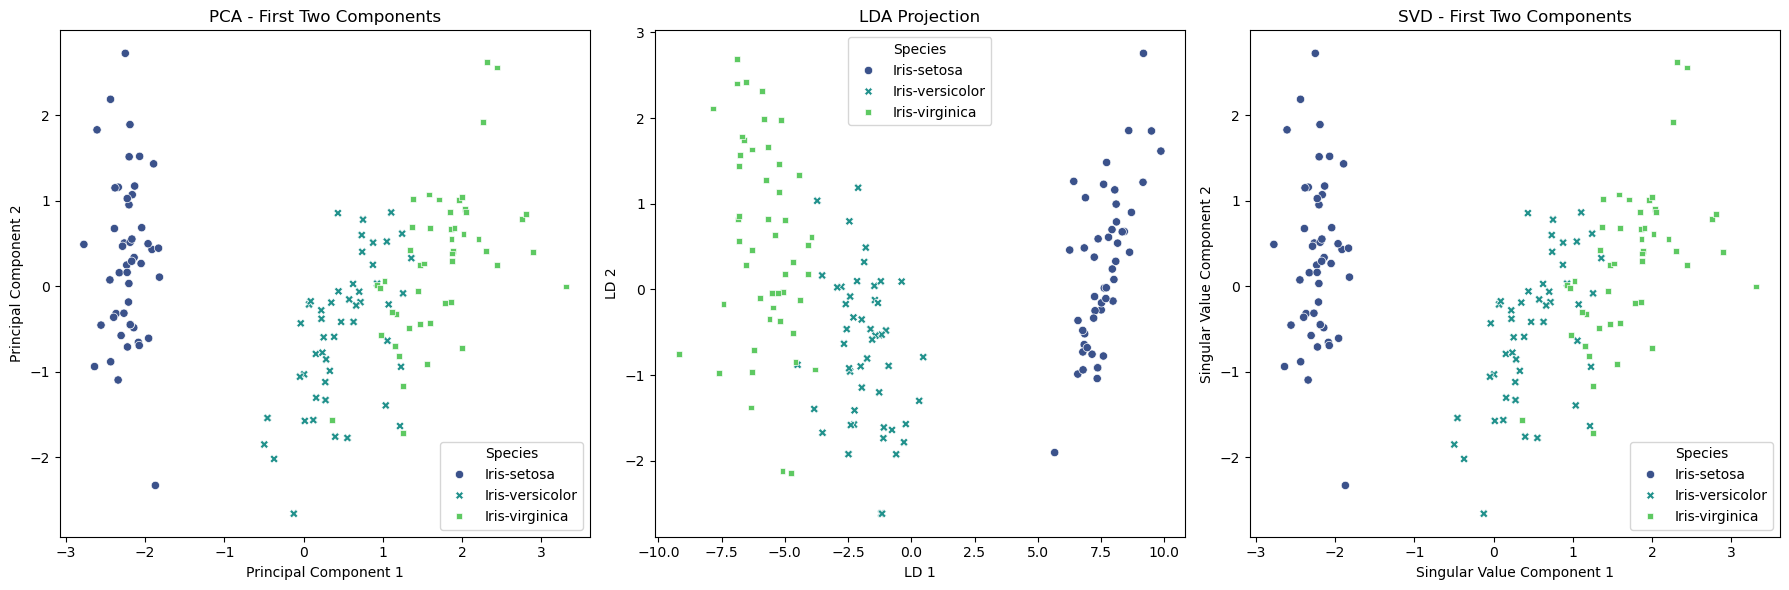

In [12]:
# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# PCA Plot
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, style=y, ax=ax[0], palette='viridis')
ax[0].set_title('PCA - First Two Components')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# LDA Plot
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, style=y, ax=ax[1], palette='viridis')
ax[1].set_title('LDA Projection')
ax[1].set_xlabel('LD 1')
ax[1].set_ylabel('LD 2')

# SVD Plot
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=y, style=y, ax=ax[2], palette='viridis')
ax[2].set_title('SVD - First Two Components')
ax[2].set_xlabel('Singular Value Component 1')
ax[2].set_ylabel('Singular Value Component 2')

plt.tight_layout()
plt.show()

C:\Users\Neil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Neil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Neil\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Neil\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Neil\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

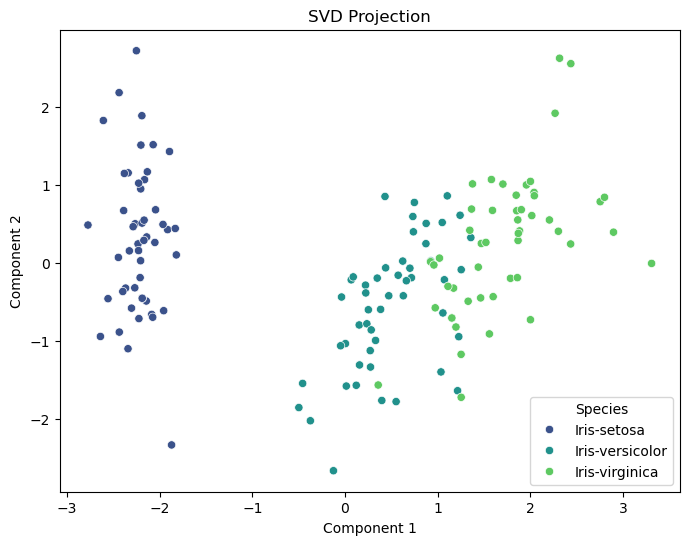

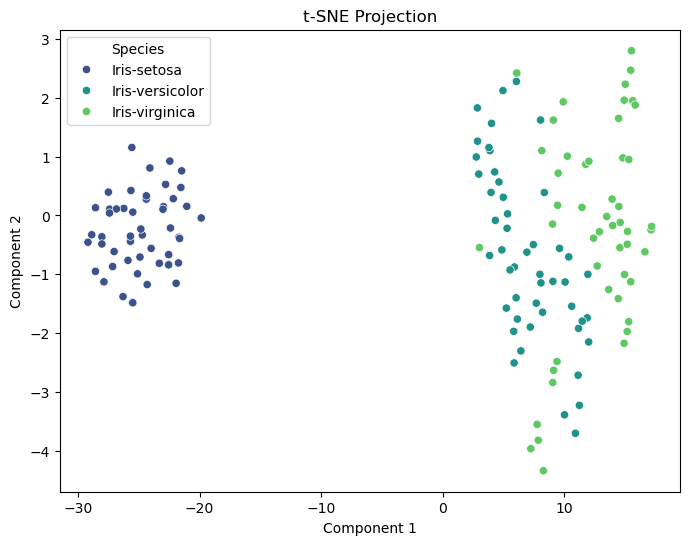

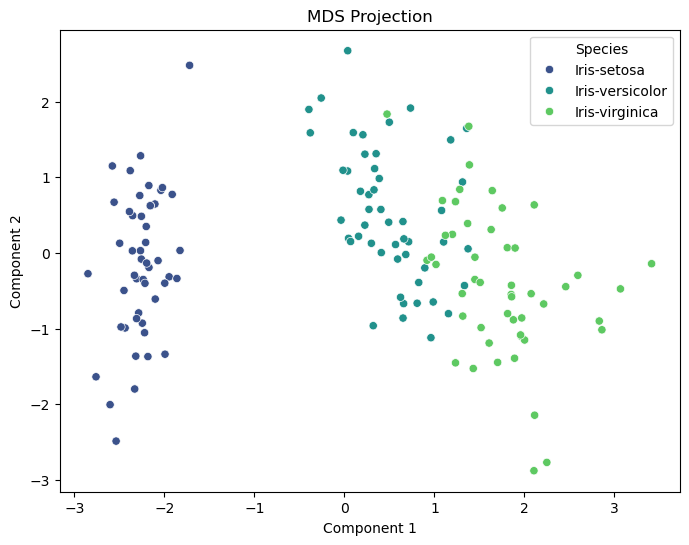

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS

# Applying SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Applying MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# Plotting the results
def plot_reduction(X_reduced, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=iris_data.iloc[:, -1], palette="viridis")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Species")
    plt.show()

plot_reduction(X_svd, "SVD Projection")
plot_reduction(X_tsne, "t-SNE Projection")
plot_reduction(X_mds, "MDS Projection")
